![](http://upload.wikimedia.org/wikipedia/commons/b/b9/Blutspende_Piktogramm.GIF)

# Background challenge

According to [Red Cross Blood](https://www.redcrossblood.org/donate-blood/how-to-donate/how-blood-donations-help/blood-needs-blood-supply.html) every 2 seconds someone in the United States needs a blood transfusion and only 1 donation can save up to 3 lives.

This challenge requests to predict whether or not a donor will give blood before a certain date.

Data is provided by _Yeh, I-Cheng_ via the [UCI Machine Learning repository](https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center)

# Solution steps

* Load data
* Data overview
* Some data preprocessing
* Model building
* Prediction

Let's begin! We will solve this challenge using Python code.

In [38]:
import pandas as pd

#Importing data
data_tr = pd.read_csv("C:/Users/ruben/OneDrive/Escritorio/PYTHON/MACHINE LEARNING/PROJECTS/Donating blood/Training.csv") #training values

data_test = pd.read_csv("C:/Users/ruben/OneDrive/Escritorio/PYTHON/MACHINE LEARNING/PROJECTS/Donating blood/Test.csv") #test values



In [32]:
#Data overview
data_tr.shape

(576, 6)

Our training set has 576 samples and 6 features.

In [5]:
data_tr.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


Let's plot *Number of donations* with *Total Volume Donated*. If you think about it, there should exist a correlation between these two. 

Text(0,0.5,'Total Volume Donated(c.c)')

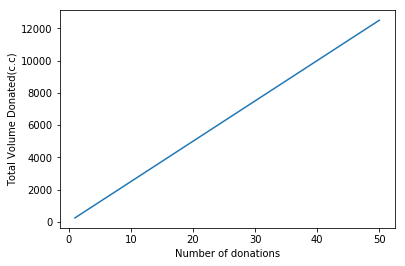

In [39]:
import matplotlib.pyplot as plt
X = data_tr.values #convert dataframe to numpy array
plt.plot(X[:,2], X[:,3])
plt.xlabel("Number of donations")
plt.ylabel("Total Volume Donated(c.c)")


In [40]:
import numpy as np
np.corrcoef(X[:,2], X[:,3])

array([[1., 1.],
       [1., 1.]])

Look! These two variables are perfectly linear correlated.

Therefore we can drop *Number of donations* feature because it doesn't provide useful information if we have *Total Volume Donated*.

The first feature is _donator id_. This feature also doesn't provide useful information, so we will remove it.

In [41]:
X = np.delete(X, 0, 1) #removing number id
X = np.delete(X, 1, 1) #removing Number of donations

#output label
y = X[:,3]
X = np.delete(X, 3, 1) #removing output label from training set

#We will do the same for the test dataset
test = data_test.values #convert dataframe to numpy array
test = np.delete(test, 0 ,1) #remove number id
test = np.delete(test, 1, 1) #remove Number of Donations



In [42]:
print("Training set dimension: ",X.shape)
print("Test set dimension: ", test.shape)

Training set dimension:  (576, 3)
Test set dimension:  (200, 3)


Now we have 3 features.

Alright, it is time to build our prediction model. We will use **Logistic regression** and cross-validation to evaluate the performance.

In [46]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
mdl = LogisticRegression() 

#cross validation scores
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mdl, X, y, cv=5)

#Printing mean score and 95% ci
print("Accuracy Logistic Regression model: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() *2))

Accuracy Logistic Regression model: 0.78 (+/- 0.04)


In [48]:
#Let's make our predictions
mdl.fit(X, y)

predictions = mdl.predict_proba(test) #predicting the probability

print(predictions)

[[0.54582724 0.45417276]
 [0.90990534 0.09009466]
 [0.70610186 0.29389814]
 [0.70594798 0.29405202]
 [0.50661194 0.49338806]
 [0.25444762 0.74555238]
 [0.67863471 0.32136529]
 [0.87941    0.12059   ]
 [0.98323148 0.01676852]
 [0.92746547 0.07253453]
 [0.84220075 0.15779925]
 [0.86379816 0.13620184]
 [0.73602049 0.26397951]
 [0.70610186 0.29389814]
 [0.71235443 0.28764557]
 [0.83939807 0.16060193]
 [0.78469317 0.21530683]
 [0.57693339 0.42306661]
 [0.93319977 0.06680023]
 [0.70509971 0.29490029]
 [0.59690266 0.40309734]
 [0.69414116 0.30585884]
 [0.64836091 0.35163909]
 [0.70610186 0.29389814]
 [0.74638258 0.25361742]
 [0.69994039 0.30005961]
 [0.66734193 0.33265807]
 [0.87941    0.12059   ]
 [0.69975839 0.30024161]
 [0.54582724 0.45417276]
 [0.68025702 0.31974298]
 [0.96908781 0.03091219]
 [0.65801493 0.34198507]
 [0.75526403 0.24473597]
 [0.80991699 0.19008301]
 [0.77226114 0.22773886]
 [0.77994559 0.22005441]
 [0.87941    0.12059   ]
 [0.66524294 0.33475706]
 [0.70610186 0.29389814]


Here, we obtained the probability of not donating blood (column 1) and probability of donating blood (column 2).

As a final step, we will prepare the results to meet the submission requirements.

In [58]:
results = predictions[:,1] #we only need the second column
results = np.round(results, 2) #round to get 3 decimals
id_results = data_test.values[:,0] # we need patient_id

In [60]:
submitted_results = np.column_stack((id_results, results))
submitted_results

array([[6.59e+02, 4.50e-01],
       [2.76e+02, 9.00e-02],
       [2.63e+02, 2.90e-01],
       [3.03e+02, 2.90e-01],
       [8.30e+01, 4.90e-01],
       [5.00e+02, 7.50e-01],
       [5.30e+02, 3.20e-01],
       [2.44e+02, 1.20e-01],
       [2.49e+02, 2.00e-02],
       [7.28e+02, 7.00e-02],
       [1.29e+02, 1.60e-01],
       [5.34e+02, 1.40e-01],
       [3.17e+02, 2.60e-01],
       [4.01e+02, 2.90e-01],
       [6.96e+02, 2.90e-01],
       [1.92e+02, 1.60e-01],
       [1.76e+02, 2.20e-01],
       [5.71e+02, 4.20e-01],
       [1.39e+02, 7.00e-02],
       [4.23e+02, 2.90e-01],
       [5.63e+02, 4.00e-01],
       [5.60e+01, 3.10e-01],
       [5.28e+02, 3.50e-01],
       [1.01e+02, 2.90e-01],
       [4.67e+02, 2.50e-01],
       [3.82e+02, 3.00e-01],
       [4.66e+02, 3.30e-01],
       [2.94e+02, 1.20e-01],
       [5.12e+02, 3.00e-01],
       [6.59e+02, 4.50e-01],
       [3.89e+02, 3.20e-01],
       [4.87e+02, 3.00e-02],
       [7.01e+02, 3.40e-01],
       [4.19e+02, 2.40e-01],
       [5.36e+

Now we have to create the .csv file.

In [61]:
#creating the csv file with pandas
df = pd.DataFrame(submitted_results)
df.to_csv("C:/Users/ruben/OneDrive/Escritorio/PYTHON/MACHINE LEARNING/PROJECTS/Donating blood/results_donating_blood.csv", index = None, header = ['', 'Made Donation in March 2007'])